In [1]:
# import package
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from collections import Counter
from matplotlib import pyplot as plt
import seaborn as sns

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

X, y = make_classification(n_samples=10000, n_features=5, weights=[0.99], flip_y=0, random_state=1234)
print(Counter(y))

Counter({0: 9900, 1: 100})


가장 개수가 적은 클래스를 제외하고는 무작위로 데이터를 삭제하는 방법인 랜덤 언더샘플링(Random Undersampling)을 구현

In [2]:
# random undersampling
undersample = RandomUnderSampler(random_state=12345)
X_undersampled, y_undersampled = undersample.fit_resample(X, y)
print(Counter(y_undersampled))

Counter({0: 100, 1: 100})


이번에는 무작위 증강을 활용하는 랜덤 오버샘플링(Random Oversampling)을 구현

In [3]:
# random oversampling
oversample = RandomOverSampler(random_state=12345)
X_oversampled, y_oversampled = oversample.fit_resample(X, y)
print(Counter(y_oversampled))

Counter({0: 9900, 1: 9900})


오버샘플링을 하는 비율을 조절해볼 수 있습니다. RandomOverSampler를 이용할 때, sampling_strategy 매개변수를 0에서 1 사이의 값으로 입력할 수 있습니다. 이 값은 (소수 집단 데이터수 / 다수 집단 데이터수)의 값을 나타냅니다. 예를 들어, 0.5로 설정한 경우에는 소수 집단인 클래스를 9900 * 0.5 = 4950개 까지만 늘리게 됩니다.

In [4]:
# random oversampling, sampling_strategy=0.5
oversample = RandomOverSampler(random_state=12345, sampling_strategy=0.5)
X_resampled, y_resampled = oversample.fit_resample(X, y)
print(Counter(y_resampled))

Counter({0: 9900, 1: 4950})


### SMOTE Oversampling
앞서 실행한 랜덤 오버샘플링의 경우, 각각의 샘플과 동일한 값을 복사하는 방식입니다. 이 경우, 동일한 값이 여러개 생성되기 때문에 각 값의 가중치가 지나치게 높아진다는 단점이 발생하게 됩니다. 그래서, 각 샘플과 유사한 값을 생성하는 방식으로 SMOTE* 등의 방법이 제안되고 있습니다.

In [5]:
# SMOTE oversampling
smote_sample = SMOTE(random_state=12345, sampling_strategy=0.5)
X_smote, y_smote = smote_sample.fit_resample(X, y)
print(Counter(y_smote))

Counter({0: 9900, 1: 4950})


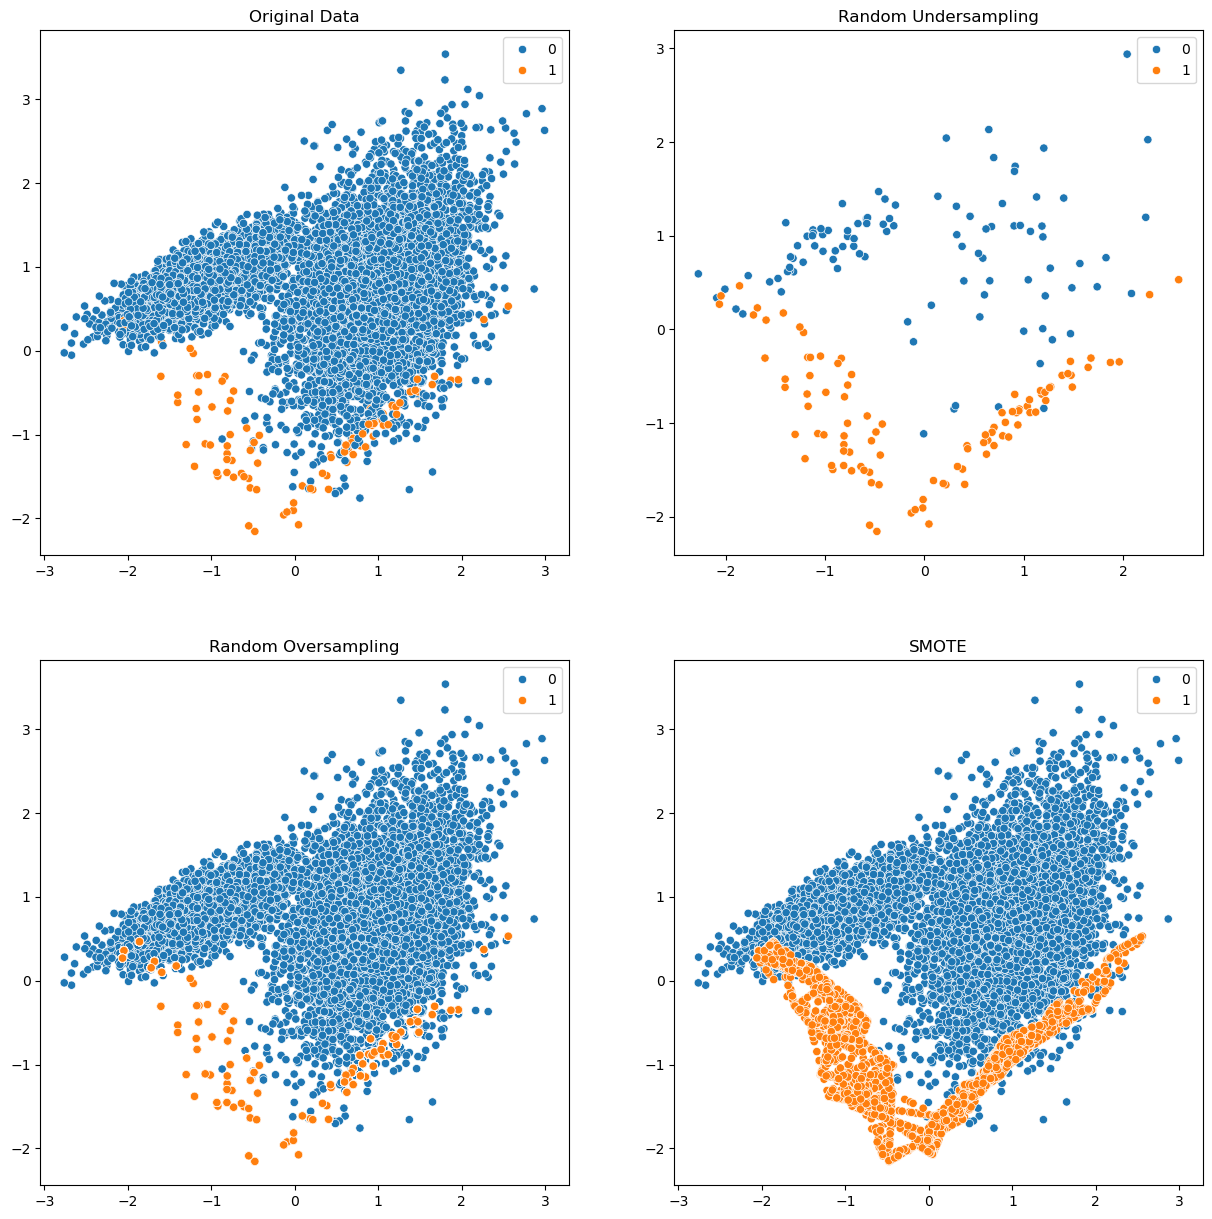

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
sns.scatterplot(x=X[:, 1], y=X[:, 2], hue=y, ax=axes[0][0])
axes[0][0].set_title('Original Data')
sns.scatterplot(x=X_undersampled[:, 1], y=X_undersampled[:,2], hue=y_undersampled, ax=axes[0][1])
axes[0][1].set_title('Random Undersampling')
sns.scatterplot(x=X_oversampled[:, 1], y=X_oversampled[:, 2], hue=y_oversampled, ax=axes[1][0])
axes[1][0].set_title('Random Oversampling')
sns.scatterplot(x=X_smote[:, 1], y=X_smote[:, 2], hue=y_smote, ax=axes[1][1])
axes[1][1].set_title('SMOTE')
plt.show()